In [4]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.13.1


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [17]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("adult.csv", header=None, skiprows=1)

column_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "wage_class",
]

dataset.columns = column_names


dataset = dataset.replace('?', np.nan).dropna()


dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Zad.
Zróbmy szybki preprocesing

In [18]:
from sklearn.model_selection import train_test_split


dataset["wage_class"] = dataset["wage_class"].replace(
    {"<=50K.": 0, "<=50K": 0, ">50K.": 1, ">50K": 1}
)
dataset.drop(["fnlwgt", "education"], axis=1, inplace=True)


x = dataset.groupby("native_country")["wage_class"].mean()
d = dict(pd.cut(x[x.index != " United-States"], 5, labels=range(5)))
dataset["native_country"] = dataset["native_country"].replace(d)

dataset = pd.get_dummies(dataset, drop_first=True)


X = dataset.drop("wage_class", axis=1)
y = dataset["wage_class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")


y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100
)

2024-05-22 22:58:55.757395: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 22:58:57.314108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/sit3kk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 22:58:58.141165: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA nod

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,771 (38.17 KB)

 Trainable params: 9,771 (38.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7651 - loss: 0.4969 - val_accuracy: 0.8175 - val_loss: 0.3770
Epoch 2/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8052 - loss: 0.3877 - val_accuracy: 0.8204 - val_loss: 0.3672
Epoch 3/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8062 - loss: 0.3800 - val_accuracy: 0.8108 - val_loss: 0.3760
Epoch 4/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8059 - loss: 0.3776 - val_accuracy: 0.8175 - val_loss: 0.3627
Epoch 5/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8086 - loss: 0.3731 - val_accuracy: 0.8151 - val_loss: 0.3706
Epoch 6/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8142 - loss: 0.3733 - val_accuracy: 0.8205 - val_loss: 0.3667
Epoch 7/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8144 - loss: 0.3690 - val_accuracy: 0.8228 - val_loss: 0.3591
Epoch 8/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8149 - loss: 0.3650 - val_accu

In [10]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [12]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Reshape labels if necessary (for example, for categorical crossentropy)
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 3s 2ms/step - loss: 0.4390 - accuracy: 0.7881 - val_loss: 0.3807 - val_accuracy: 0.8073
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3809 - accuracy: 0.8095 - val_loss: 0.3786 - val_accuracy: 0.8151
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3740 - accuracy: 0.8134 - val_loss: 0.3761 - val_accuracy: 0.7932
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3729 - accuracy: 0.8107 - val_loss: 0.3689 - val_accuracy: 0.8161
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3707 - accuracy: 0.8143 - val_loss: 0.3697 - val_accuracy: 0.8100
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3697 - accuracy: 0.8153 - val_loss: 0.3689 - val_accuracy: 0.8173
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3705 - accuracy: 0.8141 - val_loss: 0.3624 - val_accuracy: 0.8241

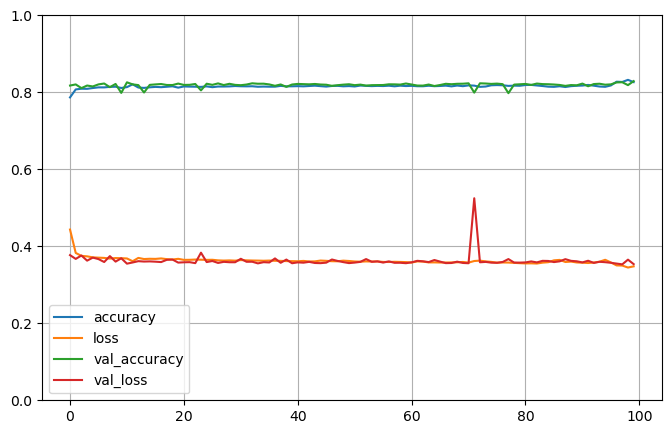

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
model.evaluate(X_test,y_test)

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8315 - loss: 0.3491


[0.3536185920238495, 0.8290002942085266]

In [22]:
from sklearn import  metrics
y_pred = model.predict(X_test)


y_pred = (y_pred > 0.5).astype(int)


accuracy = metrics.accuracy_score(y_test, y_pred)
# metrics.accuracy_score(y_true= y_test, y_pred= model.predict(X_test))
print(accuracy)

467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
0.8290002680246583


# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

history_scaled = History()
model_scaled = Sequential()
model_scaled.add(
    Dense(100, activation="sigmoid", input_shape=(X_train_scaled.shape[1],))
)
model_scaled.add(Dense(50, activation="sigmoid"))
model_scaled.add(Dense(10, activation="sigmoid"))
model_scaled.add(Dense(1, activation="sigmoid"))
model_scaled.summary()

model_scaled.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

history_scaled = model_scaled.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=32,
    epochs=100,
)

/home/sit3kk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,771 (38.17 KB)

 Trainable params: 9,771 (38.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7858 - loss: 0.4686 - val_accuracy: 0.8441 - val_loss: 0.3401
Epoch 2/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8414 - loss: 0.3429 - val_accuracy: 0.8500 - val_loss: 0.3274
Epoch 3/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8491 - loss: 0.3299 - val_accuracy: 0.8504 - val_loss: 0.3237
Epoch 4/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8472 - loss: 0.3284 - val_accuracy: 0.8509 - val_loss: 0.3217
Epoch 5/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8449 - loss: 0.3269 - val_accuracy: 0.8507 - val_loss: 0.3196
Epoch 6/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8469 - loss: 0.3252 - val_accuracy: 0.8506 - val_loss: 0.3218
Epoch 7/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8486 - loss: 0.3254 - val_accuracy: 0.8531 - val_loss: 0.3177
Epoch 8/100
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8462 - loss: 0.3210 - val_accu

# Zad. 
Stwórz wykres porównujący metody. 

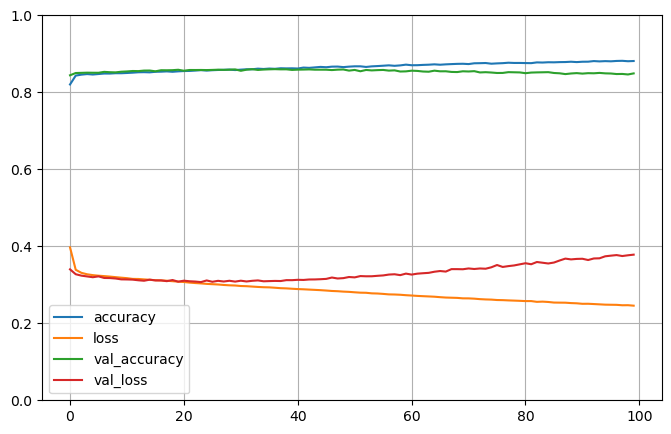

In [26]:
pd.DataFrame(history_scaled.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.8528 - loss: 0.3739
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
Accuracy on normalized data: 0.8490351112302332
             Model  Accuracy
0    Original Data  0.829000
1  Normalized Data  0.849035


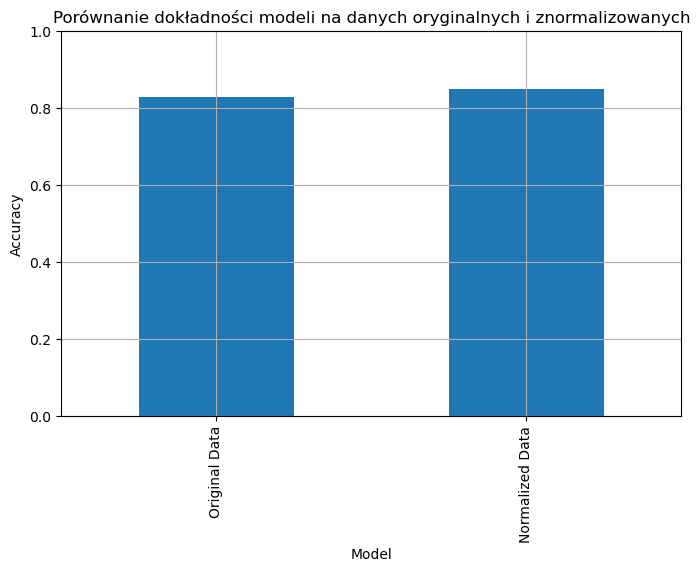

In [27]:
model_scaled.evaluate(X_test_scaled, y_test)

y_pred_scaled = model_scaled.predict(X_test_scaled)


y_pred_scaled = (y_pred_scaled > 0.5).astype(int)

accuracy_scaled = metrics.accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy on normalized data: {accuracy_scaled}")

results = {
    "Model": ["Original Data", "Normalized Data"],
    "Accuracy": [accuracy, accuracy_scaled],
}

df_results = pd.DataFrame(results)
print(df_results)

df_results.plot(x="Model", y="Accuracy", kind="bar", figsize=(8, 5), legend=False)
plt.title("Porównanie dokładności modeli na danych oryginalnych i znormalizowanych")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()